# Sevendi Eldrige Rifki Poluan🔥🔥🔥
### Descriptions: Computer Vision Fundamental

In [3]:
# working environment
!nvidia-smi

Sun Apr  9 10:42:20 2023       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 530.30.02              Driver Version: 530.30.02    CUDA Version: 12.1     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                  Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf            Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3090         On | 00000000:65:00.0 Off |                  N/A |
|  0%   43C    P8               38W / 390W|    852MiB / 24576MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

<font color='red'>Import the necessary libraries</font>

In [24]:
import tensorflow as tf
import os
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt 
import itertools
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'2.12.0'

In [3]:
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

<font color='red'>Download the Food-101 Data Set, which is a challenging data set containing 101 food categories and a total of 101,000 images. For detailed information about the dataset, you can refer to the author's [webpage](https://data.vision.ee.ethz.ch/cvl/datasets_extra/food-101/).</font>

In [8]:
!wget http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz

--2023-04-06 08:12:43--  http://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz [following]
--2023-04-06 08:12:44--  https://data.vision.ee.ethz.ch/cvl/food-101.tar.gz
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4996278331 (4.7G) [application/x-gzip]
Saving to: ‘food-101.tar.gz’

food-101.tar.gz     100%[===================>]   4.65G  5.27MB/s    in 15m 45s 

2023-04-06 08:28:30 (5.04 MB/s) - ‘food-101.tar.gz’ saved [4996278331/4996278331]



In [10]:
!ls food-101.tar.gz

food-101.tar.gz


In [20]:
!tar -xf food-101.tar.gz

In [21]:
!ls food-101

README.txt  images  license_agreement.txt  meta


In [22]:
!ls food-101/images

apple_pie	    eggs_benedict	     onion_rings
baby_back_ribs	    escargots		     oysters
baklava		    falafel		     pad_thai
beef_carpaccio	    filet_mignon	     paella
beef_tartare	    fish_and_chips	     pancakes
beet_salad	    foie_gras		     panna_cotta
beignets	    french_fries	     peking_duck
bibimbap	    french_onion_soup	     pho
bread_pudding	    french_toast	     pizza
breakfast_burrito   fried_calamari	     pork_chop
bruschetta	    fried_rice		     poutine
caesar_salad	    frozen_yogurt	     prime_rib
cannoli		    garlic_bread	     pulled_pork_sandwich
caprese_salad	    gnocchi		     ramen
carrot_cake	    greek_salad		     ravioli
ceviche		    grilled_cheese_sandwich  red_velvet_cake
cheese_plate	    grilled_salmon	     risotto
cheesecake	    guacamole		     samosa
chicken_curry	    gyoza		     sashimi
chicken_quesadilla  hamburger		     scallops
chicken_wings	    hot_and_sour_soup	     seaweed_salad
chocolate_cake	    hot_dog		     shrimp_and_grits
chocolate_mousse    huevo

In [5]:
ds_meta = [{"name": x, "total": len(os.listdir(f"food-101/images/{x}"))} for x in os.listdir("food-101/images")]

In [6]:
ds_meta

[{'name': 'lasagna', 'total': 1000},
 {'name': 'scallops', 'total': 1000},
 {'name': 'ravioli', 'total': 1000},
 {'name': 'sashimi', 'total': 1000},
 {'name': 'hot_and_sour_soup', 'total': 1000},
 {'name': 'sushi', 'total': 1000},
 {'name': 'shrimp_and_grits', 'total': 1000},
 {'name': 'waffles', 'total': 1000},
 {'name': 'chicken_wings', 'total': 1000},
 {'name': 'crab_cakes', 'total': 1000},
 {'name': 'poutine', 'total': 1000},
 {'name': 'french_toast', 'total': 1000},
 {'name': 'filet_mignon', 'total': 1000},
 {'name': 'pad_thai', 'total': 1000},
 {'name': 'miso_soup', 'total': 1000},
 {'name': 'pancakes', 'total': 1000},
 {'name': 'beignets', 'total': 1000},
 {'name': 'caesar_salad', 'total': 1000},
 {'name': 'hamburger', 'total': 1000},
 {'name': 'croque_madame', 'total': 1000},
 {'name': 'oysters', 'total': 1000},
 {'name': 'french_onion_soup', 'total': 1000},
 {'name': 'ceviche', 'total': 1000},
 {'name': 'beef_carpaccio', 'total': 1000},
 {'name': 'deviled_eggs', 'total': 1000}

<font color='red'>Load and preprocess the dataset in preparation for training and testing.</font>

In [6]:
CLASS_NAMES = os.listdir("food-101/images")
IMG_SIZE = [216, 216]
BATCH_SIZE = 32

In [7]:
training = tf.keras.utils.image_dataset_from_directory("food-101/images",
                                                       class_names=CLASS_NAMES,
                                                       label_mode="int",
                                                       image_size=IMG_SIZE,
                                                       shuffle=True,
                                                       seed=7,
                                                       validation_split=0.25,
                                                       subset="training",
                                                       batch_size=None) 
validation = tf.keras.utils.image_dataset_from_directory("food-101/images",
                                                       class_names=CLASS_NAMES,
                                                       label_mode="int",
                                                       image_size=IMG_SIZE,
                                                       shuffle=True,
                                                       seed=7,
                                                       validation_split=0.25,
                                                       subset="validation",
                                                       batch_size=None) 

Found 101000 files belonging to 101 classes.
Using 75750 files for training.
Found 101000 files belonging to 101 classes.
Using 25250 files for validation.


<font color='red'>Display a sample image from the training dataset.</font>

2023-04-09 10:52:42.300093: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [75750]
	 [[{{node Placeholder/_4}}]]
2023-04-09 10:52:42.300899: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [75750]
	 [[{{node Placeholder/_4}}]]


CAPRESE_SALAD


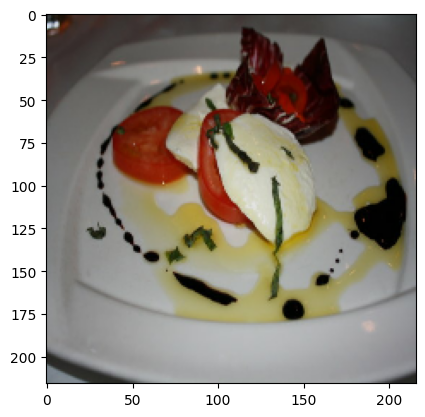

In [11]:
for x, y in training.take(1):  
    print(CLASS_NAMES[y.numpy()].upper())
    plt.imshow(np.uint8(x.numpy()))
    break

In [12]:
def func(img, lbl):
    # img = img * (1. / 255.) 
    img = tf.cast(img, dtype=tf.float32)
    return img, lbl

In [13]:
train = training.map(func, tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE).cache() 
test = validation.map(func, tf.data.AUTOTUNE).batch(BATCH_SIZE).prefetch(buffer_size=tf.data.AUTOTUNE).cache() 

<font color='red'>In this step, I will design a basic model architecture to train the dataset. I will employ transfer learning by utilizing a pre-trained model from the ImageNet dataset, specifically the EfficientNetB7 model. To do this, I will freeze all the layers of the EfficientNetB7 model up to the last 7 layers, allowing only the last 7 layers to be trainable. Here's how it will be implemented.</font>
    
    In order to accelerate the training process, I have enabled mixed precision in this environment. This is possible because the GPU I am working on supports this feature, and I will make use of its resources.
    
    It's important to note that when using mixed precision, the output needs to be in tf.float32 format.

In [14]:
tf.keras.mixed_precision.set_global_policy(policy="mixed_float16") 
tf.keras.mixed_precision.global_policy()

INFO:tensorflow:Mixed precision compatibility check (mixed_float16): OK
Your GPU will likely run quickly with dtype policy mixed_float16 as it has compute capability of at least 7.0. Your GPU: NVIDIA GeForce RTX 3090, compute capability 8.6


<Policy "mixed_float16">

In [15]:
def create_model():
    EfficientNet = tf.keras.applications.EfficientNetB7(include_top=False, 
                                              input_shape=IMG_SIZE + [3],
                                              weights='imagenet',
                                              classes=1000)
    
    for layer in EfficientNet.layers[:-7]:
        layer.trainable = False
        
    segment = tf.keras.Sequential([
        tf.keras.layers.RandomHeight(0.2),
        tf.keras.layers.RandomWidth(0.2),
        tf.keras.layers.RandomZoom(0.2),
        tf.keras.layers.RandomFlip("horizontal"),
    ])
    
    inputs = tf.keras.layers.Input(shape=IMG_SIZE + [3])
    x = segment(inputs)
    x = EfficientNet(x)
    x = tf.keras.layers.GlobalAveragePooling2D(name="g_avg_pool")(x) 
    x = tf.keras.layers.Dense(256, activation="relu")(x)
    x = tf.keras.layers.Dense(len(CLASS_NAMES))(x)
    outputs = tf.keras.layers.Activation(activation="softmax", dtype=tf.float32)(x)
    model_basic = tf.keras.Model(inputs, outputs)
    
    model_basic.compile(loss="sparse_categorical_crossentropy",
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])
    
    return model_basic

In [115]:
model_basic = create_model()
model_basic.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 216, 216, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb7 (Functional)  (None, 7, 7, 2560)       64097687  
                                                                 
 g_avg_pool (GlobalAveragePo  (None, 2560)             0         
 oling2D)                                                        
                                                                 
 dense_2 (Dense)             (None, 256)               655616    
                                                                 
 dense_3 (Dense)             (None, 101)               25957     
                                                           

<font color='red'>Define callbacks for updating the learning rate and early stopping if the model does not show improvement.</font>

In [116]:
lr_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="loss", # quantity to be monitored.
                                                   factor=0.2, # factor by which the learning rate will be reduced. new_lr = lr * factor.
                                                   patience=1, # number of epochs with no improvement after which learning rate will be reduced.
                                                   min_lr=1e-7) # lower bound on the learning rate.

In [117]:
es_callback = tf.keras.callbacks.EarlyStopping(monitor="loss",
                                               patience=1, # Number of epochs with no improvement after which training will be stopped.
                                               start_from_epoch=5,
                                               mode="min") # training will stop when the quantity monitored has stopped decreasing

<font color='red'>Now let's proceed with training the model.</font>

In [ ]:
history_basic = model_basic.fit(train,
                              epochs=75,
                              validation_data=test,
                              validation_steps=len(test),
                              callbacks=[lr_callback, es_callback])

Epoch 1/75


2023-04-09 11:39:30.259872: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [75750]
	 [[{{node Placeholder/_4}}]]
2023-04-09 11:39:30.260186: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [75750]
	 [[{{node Placeholder/_0}}]]
2023-04-09 11:39:46.537422: I tensorflow/compiler/xla/service/service.cc:169] XLA service 0x7f0b440032c0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-04-09 11:39:46.537495: I tensorflow/compiler/xla/service/service.cc:177]   StreamExecutor device (0): NVIDIA GeFo

  78/2368 [..............................] - ETA: 10:37 - loss: 3.4513 - accuracy: 0.2232

After encountering issues with saving the model using checkpoint during training, especially with EfficientNet, I have decided not to use checkpoint save during training. Instead, I will save the model after it has been trained for the defined number of epochs. However, I can still save the model weights separately due to a possible TensorFlow issue. One workaround could be creating a custom save model to bypass this error, but I will not implement this at the moment. I may consider this in future iterations of the project. The error message is attached for reference.
    
   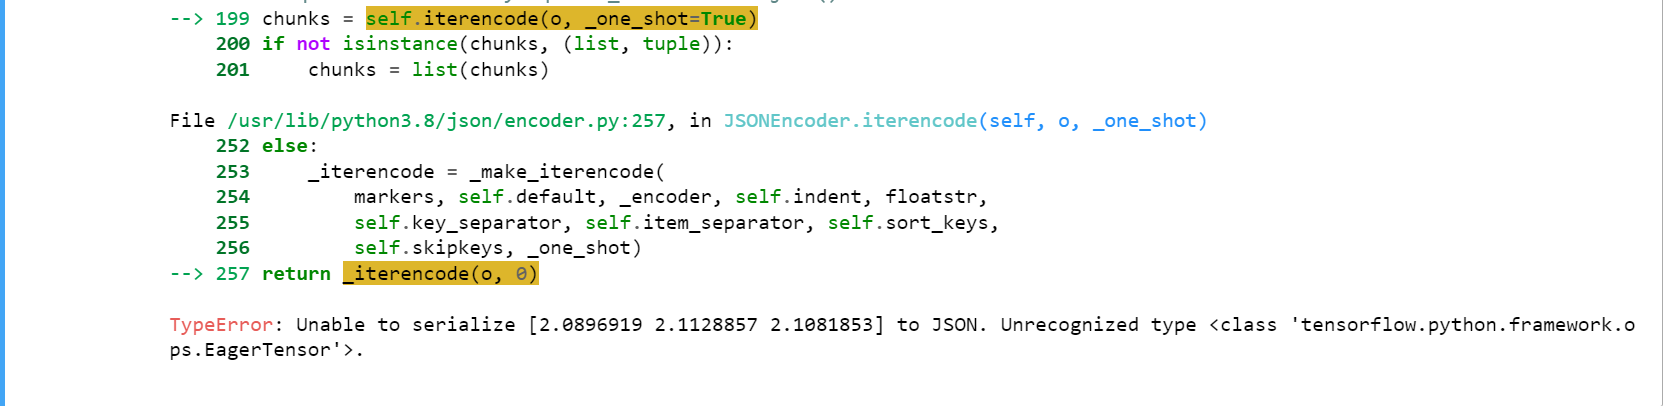
   
       Here is the method I use to save the model weights. 

In [ ]:
model_basic.save_weights("checkpoint/model-basic/")

In [2]:
!ls checkpoint/model-basic/

checkpoint


In [ ]:
nohup python food-101.py --log=stdout > food-101.log 2>&1 &

<font color='red'>However, when using this approach, it is important to note that the model needs to be loaded first, and it must be an exact match in terms of parameters and configurations. Otherwise, errors may occur when trying to load the weights.</font>

In [16]:
load_model_basic = create_model()

In [26]:
load_model_basic.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 sequential_3 (Sequential)   (None, None, None, 3)     0         
                                                                 
 efficientnetb7 (Functional)  (None, 4, 4, 2560)       64097687  
                                                                 
 g_avg_pool (GlobalAveragePo  (None, 2560)             0         
 oling2D)                                                        
                                                                 
 dense_6 (Dense)             (None, 256)               655616    
                                                                 
 dense_7 (Dense)             (None, 101)               25957     
                                                           

In [17]:
load_model_basic.load_weights("checkpoint/model-basic/")

In [18]:
pred = load_model_basic.evaluate(test)
print("Testing accuracy: ", pred[1])

2023-04-09 10:53:33.123090: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [25250]
	 [[{{node Placeholder/_4}}]]
2023-04-09 10:53:33.123425: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [25250]
	 [[{{node Placeholder/_0}}]]
2023-04-09 10:53:39.875341: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


790/790 [==============================] - 69s 78ms/step - loss: 3.3911 - accuracy: 0.6934
Testing accuracy:  0.693425714969635


In [112]:
def conf_matrix(y_test=None, y_pred=None, class_names=None):
    
    cm = confusion_matrix(y_test, y_pred)
    
    fig, ax = plt.subplots(figsize=(12, 12))
    a = ax.matshow(cm, cmap=plt.cm.Greens)  
    
    fig.colorbar(a)  
    
    ax.set(title="Confusion Matrix",
             xlabel="Predicted label",
             ylabel="Actual label",
             xticks=np.arange(len(class_names)), 
             yticks=np.arange(len(class_names)), 
             xticklabels=class_names,  
             yticklabels=class_names)
    
    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()
    
    plt.xticks(rotation=60, fontsize=4)
    plt.yticks(fontsize=5)

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]}",
                  horizontalalignment="center", color="black" if cm[i, j] < (cm.max() + cm.min()) / 2 else "white",
                  fontsize=3)

In [20]:
y_pred = load_model_basic.predict(test)

790/790 [==============================] - 50s 59ms/step


In [80]:
y_test = [y.numpy().astype(np.int32) for x, y in test]
y_t = []
for x in y_test:
    y_t.extend(x)

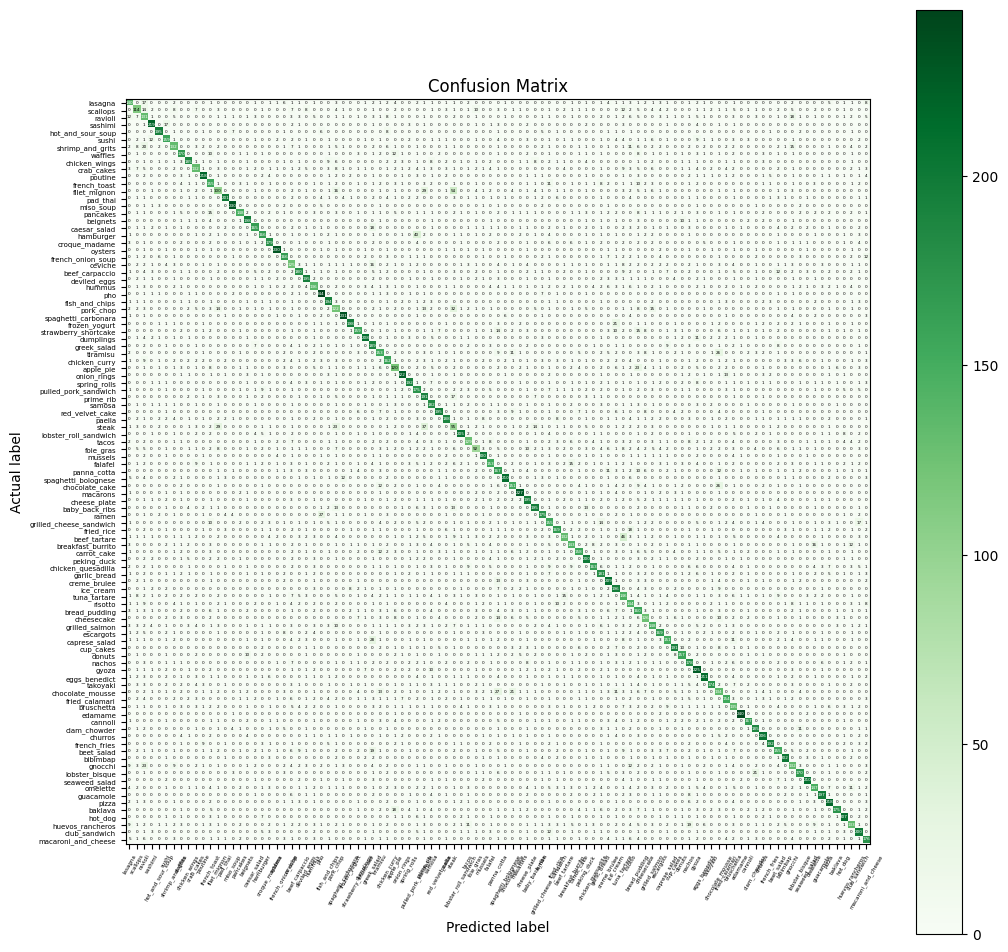

In [113]:
conf_matrix(y_test=y_t, y_pred=y_pred.argmax(axis=1), class_names=CLASS_NAMES)

# You're welcome! I hope you found this information useful and learned something new from it. 🔥🔥🔥🔥🔥🔥🔥🔥🔥